**Ulises Troncoso**

**My project will be to see what is the opinions on X/twitter on the boxer Saul 'Canelo' Alvarez. I want to see if it is positive or negative**

### Import Data

In [64]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('data/BoxingCombinedTweets_20220429_to_20220717.csv.gzip', compression='gzip')

In [66]:
df.head(10)

Unnamed: 0         hashed_userid  masked_username           location  \
0           0  73334377742589885571     ******Boxing                NaN   
1           1  28607009415535838940    *******alien1       Alabama, USA   
2           2  31478272937646159504  ********gsFroch                NaN   
3           3  83881876231803891776       *****lPulp        Montpellier   
4           4  82409696898966400608   *******ngmemes                NaN   
5           5  22005255424245224147    *******xingTV    London, England   
6           6  46406464850517204696          ****vgh      United States   
7           7  66158456633940382480  ********Glaser1  Williamsville, NY   
8           8  65305453409598398667            ***05                NaN   
9           9  35038348481243515684  ********port247           Universe   

   following  followers  totaltweets usercreateddt              tweetid  \
0       4519        913          643    2019-12-30  1519942366635118592   
1        696        702        18784    2020-12-21  1519981068174172160   
2         16        428         4740    2020-09-07  1519991134931623943   
3        112         12          215    2012-03-17  1520044699234586626   
4         44         24          170    2019-11-07  1520075159595483137   
5        196         47          642    2022-01-02  1520101330689445896   
6         66         37          599    2020-09-16  1520120773784051719   
7        132       4346        25367    2020-01-10  1520148014467321857   
8        481        115         6771    2009-06-17  1520150541766041600   
9        483        224         1102    2017-01-16  1520170979787481094   

               tweetcreatedts  ...  \
0  2022-04-29 07:31:14.000000  ...   
1  2022-04-29 10:05:01.000000  ...   
2  2022-04-29 10:45:01.000000  ...   
3  2022-04-29 14:17:52.000000  ...   
4  2022-04-29 16:18:54.000000  ...   
5  2022-04-29 18:02:54.000000  ...   
6  2022-04-29 19:20:09.000000  ...   
7  2022-04-29 21:08:24.000000  ...   
8  2022-04-29 21:18:26.000000  ...   
9  2022-04-29 22:39:39.000000  ...   

                                                text  \
0  FIGHT NEWS 🥊\nHistory will be made tomorrow ni...   
1  FIGHT NEWS 🥊\nHistory will be made tomorrow ni...   
2  How things change…Joshua used to be able to se...   
3  🤜Valdez  🆚 Stevenson\n🥊See you this Saturday, ...   
4  Naw chill homie 💀💀\n\n#boxing #andyruizjr #lol...   
5  Oscar Valdez vs Shakur Stevenson preview fight...   
6  Pre-fight analysis to #valdezstevenson . Check...   
7  @MikeCoppinger Mike, #TankDavis-#RollyRomero i...   
8  @MikeCoppinger Mike, #TankDavis-#RollyRomero i...   
9  🔥 The WBC &amp; WBO Super-Featherweight Unific...   

                                            hashtags language favorite_count  \
0  [{'text': 'loadedgloves', 'indices': [180, 193...       en              3   
1                                                 []       en              0   
2  [{'text': 'FuryWhyte', 'indices': [211, 221]},...       en              6   
3  [{'text': 'fightingmediaconcept', 'indices': [...       en              0   
4  [{'text': 'boxing', 'indices': [20, 27]}, {'te...       en              4   
5  [{'text': 'boxing', 'indices': [95, 102]}, {'t...       en              0   
6  [{'text': 'valdezstevenson', 'indices': [22, 3...       en              1   
7  [{'text': 'TankDavis', 'indices': [21, 31]}, {...       en             40   
8  [{'text': 'TankDavis', 'indices': [42, 52]}, {...       en              0   
9  [{'text': 'OscarValdez', 'indices': [182, 194]...       en              1   

   is_retweet    original_tweet_id  in_reply_to_status_id  is_quote_status  \
0       False                    0                      0            False   
1        True  1519942366635118592                      0            False   
2       False                    0                      0            False   
3       False                    0                      0            False   
4       False                    0          

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997809 entries, 0 to 1997808
Data columns (total 21 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   hashed_userid          object
 2   masked_username        object
 3   location               object
 4   following              int64 
 5   followers              int64 
 6   totaltweets            int64 
 7   usercreateddt          object
 8   tweetid                int64 
 9   tweetcreatedts         object
 10  retweetcount           int64 
 11  text                   object
 12  hashtags               object
 13  language               object
 14  favorite_count         int64 
 15  is_retweet             bool  
 16  original_tweet_id      int64 
 17  in_reply_to_status_id  int64 
 18  is_quote_status        bool  
 19  quoted_status_id       int64 
 20  extractedts            object
dtypes: bool(2), int64(10), object(9)
memory usage: 293.4+ MB


In [141]:
df.describe()

Unnamed: 0     following     followers   totaltweets       tweetid  \
count  1.086947e+06  1.086947e+06  1.086947e+06  1.086947e+06  1.086947e+06   
mean   1.066303e+06  1.766387e+03  1.645273e+04  1.546405e+05  1.535005e+18   
std    5.636657e+05  7.923078e+03  2.766383e+05  3.966406e+05  8.160562e+15   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.519942e+18   
25%    6.023945e+05  6.300000e+01  1.030000e+02  1.988000e+03  1.525520e+18   
50%    1.099840e+06  3.600000e+02  6.550000e+02  1.214100e+04  1.536209e+18   
75%    1.548688e+06  1.274000e+03  2.592000e+03  8.421000e+04  1.541390e+18   
max    1.997808e+06  1.119435e+06  4.799809e+07  4.096167e+06  1.548539e+18   

       retweetcount  favorite_count  original_tweet_id  in_reply_to_status_id  \
count  1.086947e+06    1.086947e+06          1086947.0           1.086947e+06   
mean   9.417745e-01    4.440633e+00                0.0           8.343705e+16   
std    3.294836e+01    1.337879e+02                0.0           3.476890e+17   
min    0.000000e+00    0.000000e+00                0.0           0.000000e+00   
25%    0.000000e+00    0.000000e+00                0.0           0.000000e+00   
50%    0.000000e+00    0.000000e+00                0.0           0.000000e+00   
75%    0.000000e+00    1.000000e+00                0.0           0.000000e+00   
max    2.298700e+04    8.139000e+04                0.0           1.548529e+18   

       quoted_status_id  
count      1.086947e+06  
mean       6.150788e+16  
std        3.005159e+17  
min        0.000000e+00  
25%        0.000000e+00  
50%        0.000000e+00  
75%        0.000000e+00  
max        1.548529e+18

### Cleaning the Dataset

In [68]:
df = df[df["is_retweet"].isin([False])]

In [69]:
df.head(10)

Unnamed: 0         hashed_userid  masked_username           location  \
0            0  73334377742589885571     ******Boxing                NaN   
2            2  31478272937646159504  ********gsFroch                NaN   
3            3  83881876231803891776       *****lPulp        Montpellier   
4            4  82409696898966400608   *******ngmemes                NaN   
5            5  22005255424245224147    *******xingTV    London, England   
6            6  46406464850517204696          ****vgh      United States   
7            7  66158456633940382480  ********Glaser1  Williamsville, NY   
9            9  35038348481243515684  ********port247           Universe   
11          11  42602746350010380599       *****g_FOF      Baltimore, MD   
12          12  42602746350010380599       *****g_FOF      Baltimore, MD   

    following  followers  totaltweets usercreateddt              tweetid  \
0        4519        913          643    2019-12-30  1519942366635118592   
2          16        428         4740    2020-09-07  1519991134931623943   
3         112         12          215    2012-03-17  1520044699234586626   
4          44         24          170    2019-11-07  1520075159595483137   
5         196         47          642    2022-01-02  1520101330689445896   
6          66         37          599    2020-09-16  1520120773784051719   
7         132       4346        25367    2020-01-10  1520148014467321857   
9         483        224         1102    2017-01-16  1520170979787481094   
11       9208      10940        14798    2010-12-09  1520197068526129154   
12       9208      10940        14798    2010-12-09  1520197111433859073   

                tweetcreatedts  ...  \
0   2022-04-29 07:31:14.000000  ...   
2   2022-04-29 10:45:01.000000  ...   
3   2022-04-29 14:17:52.000000  ...   
4   2022-04-29 16:18:54.000000  ...   
5   2022-04-29 18:02:54.000000  ...   
6   2022-04-29 19:20:09.000000  ...   
7   2022-04-29 21:08:24.000000  ...   
9   2022-04-29 22:39:39.000000  ...   
11  2022-04-30 00:23:19.000000  ...   
12  2022-04-30 00:23:29.000000  ...   

                                                 text  \
0   FIGHT NEWS 🥊\nHistory will be made tomorrow ni...   
2   How things change…Joshua used to be able to se...   
3   🤜Valdez  🆚 Stevenson\n🥊See you this Saturday, ...   
4   Naw chill homie 💀💀\n\n#boxing #andyruizjr #lol...   
5   Oscar Valdez vs Shakur Stevenson preview fight...   
6   Pre-fight analysis to #valdezstevenson . Check...   
7   @MikeCoppinger Mike, #TankDavis-#RollyRomero i...   
9   🔥 The WBC &amp; WBO Super-Featherweight Unific...   
11  TYSON FURY BEATS MUHAMMED ALI AND MIKE TYSON H...   
12  BOB ARUM PICKS ERROL SPENCE JR TO BEAT TERENCE...   

                                             hashtags language favorite_count  \
0   [{'text': 'loadedgloves', 'indices': [180, 193...       en              3   
2   [{'text': 'FuryWhyte', 'indices': [211, 221]},...       en              6   
3   [{'text': 'fightingmediaconcept', 'indices': [...       en              0   
4   [{'text': 'boxing', 'indices': [20, 27]}, {'te...       en              4   
5   [{'text': 'boxing', 'indices': [95, 102]}, {'t...       en              0   
6   [{'text': 'valdezstevenson', 'indices': [22, 3...       en              1   
7   [{'text': 'TankDavis', 'indices': [21, 31]}, {...       en             40   
9   [{'text': 'OscarValdez', 'indices': [182, 194]...       en              1   
11  [{'text': 'terencecrawford', 'indices': [113, ...       en              0   
12  [{'text': 'terencecrawford', 'indices': [113, ...       en              0   

    is_retweet  original_tweet_id  in_reply_to_status_id  is_quote_status  \
0        False                  0                      0            False   
2        False                  0                      0            False   
3        False                  0                      0            False   
4        False                  0                      0            Fals

In [70]:
df.shape

(1086947, 21)

I am going to delete the columns that are unessary. So I am going to create a new dataframe

In [71]:
df_tweets = df[['tweetid','text']]

In [72]:
df_tweets.head(10)

tweetid                                               text
0   1519942366635118592  FIGHT NEWS 🥊\nHistory will be made tomorrow ni...
2   1519991134931623943  How things change…Joshua used to be able to se...
3   1520044699234586626  🤜Valdez  🆚 Stevenson\n🥊See you this Saturday, ...
4   1520075159595483137  Naw chill homie 💀💀\n\n#boxing #andyruizjr #lol...
5   1520101330689445896  Oscar Valdez vs Shakur Stevenson preview fight...
6   1520120773784051719  Pre-fight analysis to #valdezstevenson . Check...
7   1520148014467321857  @MikeCoppinger Mike, #TankDavis-#RollyRomero i...
9   1520170979787481094  🔥 The WBC &amp; WBO Super-Featherweight Unific...
11  1520197068526129154  TYSON FURY BEATS MUHAMMED ALI AND MIKE TYSON H...
12  1520197111433859073  BOB ARUM PICKS ERROL SPENCE JR TO BEAT TERENCE...

In [73]:
#lowercase the text column
df_tweets['text'] = df_tweets['text'].str.lower()

In [74]:
#only getting columns that mention canelo
df_tweets= df_tweets[df_tweets['text'].str.contains("canelo")]

In [75]:
df_tweets.isnull().sum()

tweetid    0
text       0
dtype: int64

In [76]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23392 entries, 3 to 1997796
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweetid  23392 non-null  int64 
 1   text     23392 non-null  object
dtypes: int64(1), object(1)
memory usage: 548.2+ KB


In [77]:
df_tweets.head(10)

tweetid                                               text
3   1520044699234586626  🤜valdez  🆚 stevenson\n🥊see you this saturday, ...
4   1520075159595483137  naw chill homie 💀💀\n\n#boxing #andyruizjr #lol...
11  1520197068526129154  tyson fury beats muhammed ali and mike tyson h...
12  1520197111433859073  bob arum picks errol spence jr to beat terence...
13  1520197157164302338  shakur stevenson on steroids ldbc accuses snac...
17  1520441466878889984  if #canelo fights #ggg i’m keeping the same en...
18  1520480053406097409  👑one week champion👑🗓️\n\nvia : @canelo  \n@can...
21  1520542680513662976  tale of the tape 📐\n@oscarvaldez56 🇲🇽\n@shakur...
22  1520545886513807360  🚨 adalaide byrd i see you 👀 hope you get it ri...
34  1520623304226267139  you can sign with @caneloteam all you want but...

In [79]:
#These are to further getting rid of promotionoal tweets
df_tweets = df_tweets[df_tweets["text"].str.contains('stream') == False]
df_tweets = df_tweets[df_tweets["text"].str.contains('live') == False]
df_tweets = df_tweets[df_tweets["text"].str.contains('ufc') == False]

In [92]:
df_tweets.shape

(19635, 2)

### Using Regular Expression to clean the tweets 

In [93]:
#getting rid of repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_tweets['text'] = df_tweets['text'].apply(lambda x: cleaning_repeating_char(x))
df_tweets['text'].head(10)

3      🤜valdez  🆚 stevenson\n🥊see you this saturday, ...
4      naw chill homie 💀💀\n\n#boxing #andyruizjr #lol...
11     tyson fury beats muhammed ali and mike tyson h...
12     bob arum picks errol spence jr to beat terence...
13     shakur stevenson on steroids ldbc accuses snac...
17     if #canelo fights #ggg i’m keeping the same en...
18     👑one week champion👑🗓️\n\nvia : @canelo  \n@can...
21     tale of the tape 📐\n@oscarvaldez56 🇲🇽\n@shakur...
34     you can sign with @caneloteam all you want but...
161    canelo watching this fight: #boxing #stevenson...
Name: text, dtype: object

In [94]:
#getting rid of @ and the following
def atsymbol(data):
    return re.sub(r"@\S+",'', data)
df_tweets['text'] = df_tweets['text'].apply(lambda x: atsymbol(x))
df_tweets['text'].head(10)

3      🤜valdez  🆚 stevenson\n🥊see you this saturday, ...
4      naw chill homie 💀💀\n\n#boxing #andyruizjr #lol...
11     tyson fury beats muhammed ali and mike tyson h...
12     bob arum picks errol spence jr to beat terence...
13     shakur stevenson on steroids ldbc accuses snac...
17     if #canelo fights #ggg i’m keeping the same en...
18     👑one week champion👑🗓️\n\nvia :   \n  \n\n#figh...
21     tale of the tape 📐\n 🇲🇽\n 🇺🇸\nhttps://t.co/dvl...
34     you can sign with  all you want but that doesn...
161    canelo watching this fight: #boxing #stevenson...
Name: text, dtype: object

In [95]:
#getting rid of hastags
def hashtag(data):
    return re.sub(r"#\S+",'', data)
df_tweets['text'] = df_tweets['text'].apply(lambda x: hashtag(x))
df_tweets['text'].head(10)

3      🤜valdez  🆚 stevenson\n🥊see you this saturday, ...
4      naw chill homie 💀💀\n\n           https://t.co/...
11     tyson fury beats muhammed ali and mike tyson h...
12     bob arum picks errol spence jr to beat terence...
13     shakur stevenson on steroids ldbc accuses snac...
17     if  fights  i’m keeping the same energy. no re...
18     👑one week champion👑🗓️\n\nvia :   \n  \n\n     ...
21     tale of the tape 📐\n 🇲🇽\n 🇺🇸\nhttps://t.co/dvl...
34     you can sign with  all you want but that doesn...
161    canelo watching this fight:   https://t.co/cat...
Name: text, dtype: object

In [96]:
#getting rid of urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_tweets['text'] = df_tweets['text'].apply(lambda x: cleaning_URLs(x))
df_tweets['text'].head(10)

3      🤜valdez  🆚 stevenson\n🥊see you this saturday, ...
4                     naw chill homie 💀💀\n\n            
11     tyson fury beats muhammed ali and mike tyson h...
12     bob arum picks errol spence jr to beat terence...
13     shakur stevenson on steroids ldbc accuses snac...
17     if  fights  i’m keeping the same energy. no re...
18     👑one week champion👑🗓️\n\nvia :   \n  \n\n     ...
21     tale of the tape 📐\n 🇲🇽\n 🇺🇸\n s4fqbe\n.\n.\n ...
34     you can sign with  all you want but that doesn...
161                      canelo watching this fight:    
Name: text, dtype: object

In [97]:
#finally getting rid of everything punctions,emojis etc
def cleaningeverythingelse(data):
    return re.sub(r"[^a-zA-Z]",' ', data)
df_tweets['text'] = df_tweets['text'].apply(lambda x: cleaningeverythingelse(x))
df_tweets['text'].head(10)

3       valdez    stevenson  see you this saturday  a...
4                       naw chill homie                 
11     tyson fury beats muhammed ali and mike tyson h...
12     bob arum picks errol spence jr to beat terence...
13     shakur stevenson on steroids ldbc accuses snac...
17     if  fights  i m keeping the same energy  no re...
18      one week champion     via                       
21     tale of the tape            s fqbe            ...
34     you can sign with  all you want but that doesn...
161                      canelo watching this fight     
Name: text, dtype: object

### Using the nltk to tokenize

In [98]:
import nltk
from nltk.corpus import stopwords

In [99]:
stop_words = set(stopwords.words('english'))

In [100]:
#code to for getting rid of any stop words
STOPWORDS = set(stop_words)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_tweets['text'] = df_tweets['text'].apply(lambda text: cleaning_stopwords(text))
df_tweets['text'].head(10)

3      valdez stevenson see saturday april mgm grand ...
4                                        naw chill homie
11     tyson fury beats muhammed ali mike tyson hes g...
12     bob arum picks errol spence jr beat terence cr...
13     shakur stevenson steroids ldbc accuses snac at...
17     fights keeping energy reason fight year old tr...
18                                 one week champion via
21                                        tale tape fqbe
34                                        sign want mean
161                                canelo watching fight
Name: text, dtype: object

In [105]:
df_tweets.head(10)

tweetid                                               text
3    1520044699234586626  valdez stevenson see saturday april mgm grand ...
4    1520075159595483137                                    naw chill homie
11   1520197068526129154  tyson fury beats muhammed ali mike tyson hes g...
12   1520197111433859073  bob arum picks errol spence jr beat terence cr...
13   1520197157164302338  shakur stevenson steroids ldbc accuses snac at...
17   1520441466878889984  fights keeping energy reason fight year old tr...
18   1520480053406097409                              one week champion via
21   1520542680513662976                                     tale tape fqbe
34   1520623304226267139                                     sign want mean
161  1520623611081502720                              canelo watching fight

In [106]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df_tweets['tokenized'] = df_tweets['text'].apply(tokenizer.tokenize)
df_tweets['tokenized'].head()

3     [valdez, stevenson, see, saturday, april, mgm,...
4                                   [naw, chill, homie]
11    [tyson, fury, beats, muhammed, ali, mike, tyso...
12    [bob, arum, picks, errol, spence, jr, beat, te...
13    [shakur, stevenson, steroids, ldbc, accuses, s...
Name: tokenized, dtype: object

### Stemmer

In [107]:
#stemmer code
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_tweets['stemmer']= df_tweets['tokenized'].apply(lambda x: stemming_on_text(x))
df_tweets['stemmer'].head(10)

3      [valdez, stevenson, see, saturday, april, mgm,...
4                                    [naw, chill, homie]
11     [tyson, fury, beats, muhammed, ali, mike, tyso...
12     [bob, arum, picks, errol, spence, jr, beat, te...
13     [shakur, stevenson, steroids, ldbc, accuses, s...
17     [fights, keeping, energy, reason, fight, year,...
18                            [one, week, champion, via]
21                                    [tale, tape, fqbe]
34                                    [sign, want, mean]
161                            [canelo, watching, fight]
Name: stemmer, dtype: object

### Lemmatization

In [108]:
#lemmatization code
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_tweets['lemmatize'] = df_tweets['stemmer'].apply(lambda x: lemmatizer_on_text(x))
df_tweets['lemmatize'].head(10)

3      [valdez, stevenson, see, saturday, april, mgm,...
4                                    [naw, chill, homie]
11     [tyson, fury, beats, muhammed, ali, mike, tyso...
12     [bob, arum, picks, errol, spence, jr, beat, te...
13     [shakur, stevenson, steroids, ldbc, accuses, s...
17     [fights, keeping, energy, reason, fight, year,...
18                            [one, week, champion, via]
21                                    [tale, tape, fqbe]
34                                    [sign, want, mean]
161                            [canelo, watching, fight]
Name: lemmatize, dtype: object

### WordCloud

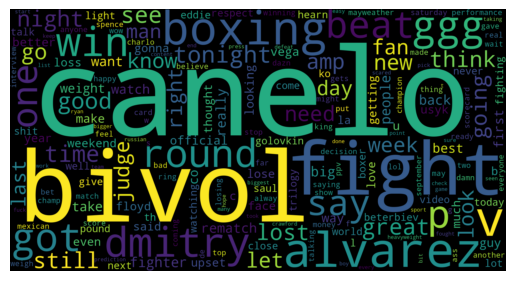

In [127]:
#ploting the wordcloud
from wordcloud import WordCloud
topic = df_tweets['lemmatize'].to_string()
word_cloud2 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(topic)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


### Tokenize using Word_tokenize

In [110]:
from nltk.tokenize import  word_tokenize

In [111]:
#tokenize the column text and creating another column
df_tweets['tokenized_text'] = df_tweets['text'].apply(word_tokenize) 

In [112]:
from nltk.probability import FreqDist

In [113]:
#using the newly created to find the frequency
fdist = FreqDist(df_tweets['tokenized_text'].astype(str))

In [114]:
#the most common tweets
fdist.most_common(10)

[("['bivol']", 107),
 ("['official']", 73),
 ("['canelo', 'alvarez', 'says', 'pacquiao', 'scared', 'floyd', 'mayweather']",
  67),
 ("['saul', 'canelo', 'alvarez', 'interview', 'manny', 'pacquiao', 'b', 'fighter']",
  66),
 ("['rubber', 'match', 'official']", 55),
 ('[]', 44),
 ("['fight', 'week']", 35),
 ("['fight', 'night']", 32),
 ("['dazn', 'matchroom', 'sports', 'stepped', 'gave', 'people', 'yearned', 'biggest', 'remaining', 'fight', 'respect']",
  32),
 ("['personal', 'september', 'gets', 'settled']", 26)]

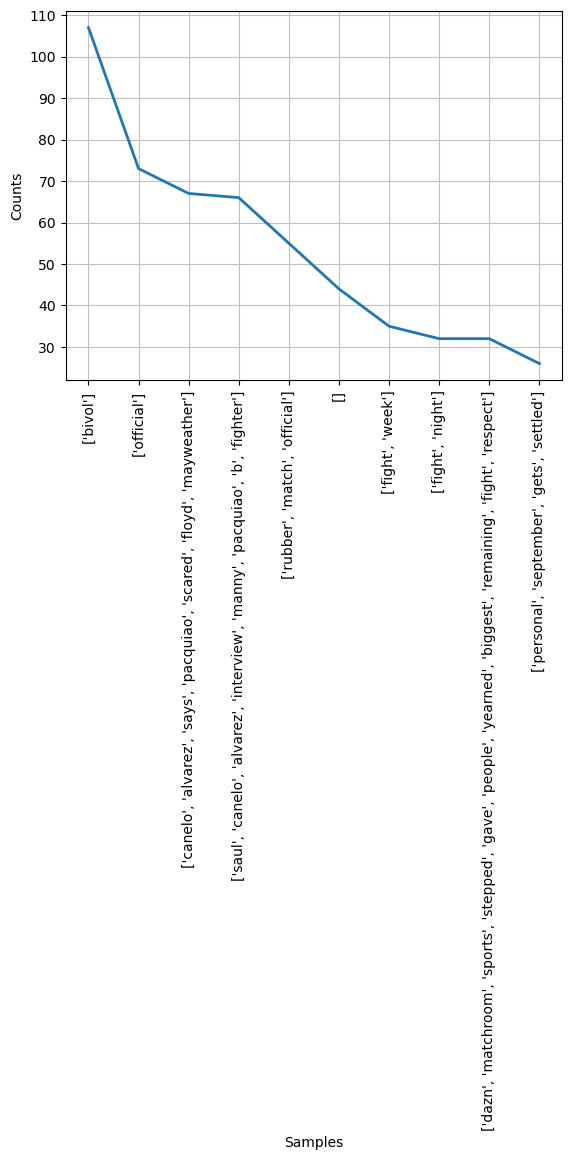

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [115]:
#plotting the most common tweets
fdist.plot(10)

A lot of Bivol

### LDA

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [117]:
#create a vectorized document term matrix using TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [118]:
#creating a document term matrix dtm using tfidf.fit_transform
dtm = tfidf.fit_transform(df_tweets['text'].tolist())

In [119]:
#create and instance of a LDA
LDA = LatentDirichletAllocation(n_components=15, random_state=42)

In [120]:
#fit the model
LDA.fit(dtm)

LatentDirichletAllocation(n_components=15, random_state=42)

In [121]:
#Using a for loop, print out the top 5 most common words for each of the 20 topics
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 5 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['eddie', 'fight', 'canelo', 'let', 'day']


THE TOP 5 WORDS FOR TOPIC #1
['fight', 'knock', 'bro', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #2
['lost', 'damn', 'got', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #3
['ggg', 'canelo', 'september', 'trilogy', 'vs']


THE TOP 5 WORDS FOR TOPIC #4
['charlo', 'like', 'fight', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #5
['canelo', 'pacquiao', 'mayweather', 'floyd', 'alvarez']


THE TOP 5 WORDS FOR TOPIC #6
['round', 'judges', 'fight', 'canelo', 'bivol']


THE TOP 5 WORDS FOR TOPIC #7
['tonight', 'dmitry', 'pound', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #8
['plan', 'gonna', 'fight', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #9
['rubber', 'wow', 'canelo', 'match', 'official']


THE TOP 5 WORDS FOR TOPIC #10
['mayo', 'looks', 'fight', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #11
['needs', 'fight', 'win', 'bivol', 'canelo']


THE TOP 5 WORDS FOR TOPIC #12
['crawford', 'canelo', 'night

In [122]:
#Add a new column to the original dataframe that labels each text into one of the 15 topic categories
topic_results = LDA.transform(dtm)

In [123]:
df_tweets['Topic'] = topic_results.argmax(axis=1)

In [124]:
df_tweets.head(10)

tweetid                                               text  \
3    1520044699234586626  valdez stevenson see saturday april mgm grand ...   
4    1520075159595483137                                    naw chill homie   
11   1520197068526129154  tyson fury beats muhammed ali mike tyson hes g...   
12   1520197111433859073  bob arum picks errol spence jr beat terence cr...   
13   1520197157164302338  shakur stevenson steroids ldbc accuses snac at...   
17   1520441466878889984  fights keeping energy reason fight year old tr...   
18   1520480053406097409                              one week champion via   
21   1520542680513662976                                     tale tape fqbe   
34   1520623304226267139                                     sign want mean   
161  1520623611081502720                              canelo watching fight   

                                             tokenized  \
3    [valdez, stevenson, see, saturday, april, mgm,...   
4                                  [naw, chill, homie]   
11   [tyson, fury, beats, muhammed, ali, mike, tyso...   
12   [bob, arum, picks, errol, spence, jr, beat, te...   
13   [shakur, stevenson, steroids, ldbc, accuses, s...   
17   [fights, keeping, energy, reason, fight, year,...   
18                          [one, week, champion, via]   
21                                  [tale, tape, fqbe]   
34                                  [sign, want, mean]   
161                          [canelo, watching, fight]   

                                               stemmer  \
3    [valdez, stevenson, see, saturday, april, mgm,...   
4                                  [naw, chill, homie]   
11   [tyson, fury, beats, muhammed, ali, mike, tyso...   
12   [bob, arum, picks, errol, spence, jr, beat, te...   
13   [shakur, stevenson, steroids, ldbc, accuses, s...   
17   [fights, keeping, energy, reason, fight, year,...   
18                          [one, week, champion, via]   
21                                  [tale, tape, fqbe]   
34                                  [sign, want, mean]   
161                          [canelo, watching, fight]   

                                             lemmatize  \
3    [valdez, stevenson, see, saturday, april, mgm,...   
4                                  [naw, chill, homie]   
11   [tyson, fury, beats, muhammed, ali, mike, tyso...   
12   [bob, arum, picks, errol, spence, jr, beat, te...   
13   [shakur, stevenson, steroids, ldbc, accuses, s...   
17   [fights, keeping, energy, reason, fight, year,...   
18                          [one, week, champion, via]   
21                                  [tale, tape, fqbe]   
34                                  [sign, want, mean]   
161                          [canelo, watching, fight]   

                                        tokenized_text  Topic  
3    [valdez, stevenson, see, saturday, april, mgm,...     14  
4                                  [naw, chill, homie]      8  
11   [tyson, fury, beats, muhammed, ali, mike, tyso...      7  
12   [bob, arum, picks, errol, spence, jr, beat, te...     12  
13   [shakur, stevenson, steroids, ldbc, accuses, s...      0  
17   [fights, keeping, energy, reason, fight, year,...      0  
18                          [one, week, champion, via]     14  
21                                  [tale, tape, fqbe]     10  
34                                  [sign, want, mean]      4  
161                          [canelo, watching, fight]      3

In [125]:
topic = df_tweets[df_tweets['Topic'] == 8]['text'].to_string()

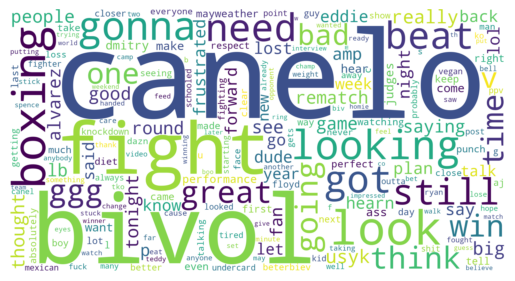

In [126]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(topic)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


**I was hoping to get more descriptive language regarding canelo or more opions. Boxing is not really popular so it is expected. There were more promotion than indepth destription. But on the bright side I can see that Bivol comes up alot because that is Canelo's most current lost. So I can say with the current tweets about Canelo Bivol will be mention, his lost, so in a way there is more negative opinion towards Canelo**